In [102]:
import os
import re
import collections
import numpy as np
import jieba
import wordcloud
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
path='./dp/'
    
def getWordList(path):
    files = os.listdir( path )
    dicts={}
    pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
    for f in files:
        filename = os.path.join('%s%s' % (path, f))
        with open(filename, 'r') as ff: # r 代表read
            for eachLine in ff:
                pass
                #print( "读取到得内容如下：",eachLine)
                nuns = jieba.cut(eachLine, cut_all=False)
                for n in nuns:
                    if n in [' ','，','、',';','\n','。','；','/','-','：','1','2','3','4',
                             '5','6','7','8','9','0','（','）',',','的',u'的', u'，',u'和',
                             u'是', u'随着', u'对于', u'对',u'等',u'能',u'都',u'。',u' ',u'、',u'中',u'在',u'了',
                    u'通常',u'如果',u'我们',u'需要'] or len(n)==1:
                        continue
                    n = re.sub(pattern, '', n) # 将符合模式的字符去除
                    if n in dicts:
                        dicts[n]+=1
                    else:
                        dicts[n] = 1
    return dicts

In [104]:
sorted(getWordList('./ml/').items(), key=lambda x:x[1], reverse=True)[:10]

[('学习', 1323),
 ('算法', 839),
 ('机器', 784),
 ('技术', 624),
 ('熟悉', 569),
 ('相关', 566),
 ('经验', 563),
 ('数据', 513),
 ('能力', 507),
 ('公司', 490)]

词云准备

    conda install re # 正则表达式库
    conda install collections # 词频统计库
    conda install numpy  # numpy数据处理库
    conda install jieba  # 结巴分词
    conda install wordcloud # 词云展示库
    conda install PIL   # 图像处理库
    conda install matplotlib.pyplot # 图像展示库

In [105]:
def show(wordList):
    # mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
    # 查看系统中的中文字体 sudo fc-list :lang=zh
    wc = wordcloud.WordCloud(
        font_path='/usr/share/fonts/truetype/wqy/wqy-microhei.ttc', # 设置字体格式
    #     mask=mask, # 设置背景图
        max_words=300, # 最多显示词数
        max_font_size=80, # 字体最大值
        background_color="white",
        width=1000,
        height=860,
    )

    wc.generate_from_frequencies(wordList) # 从字典生成词云
    # image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
    # wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
    plt.figure(figsize=(60,40)) 
    plt.imshow(wc) # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.show() # 显示图像

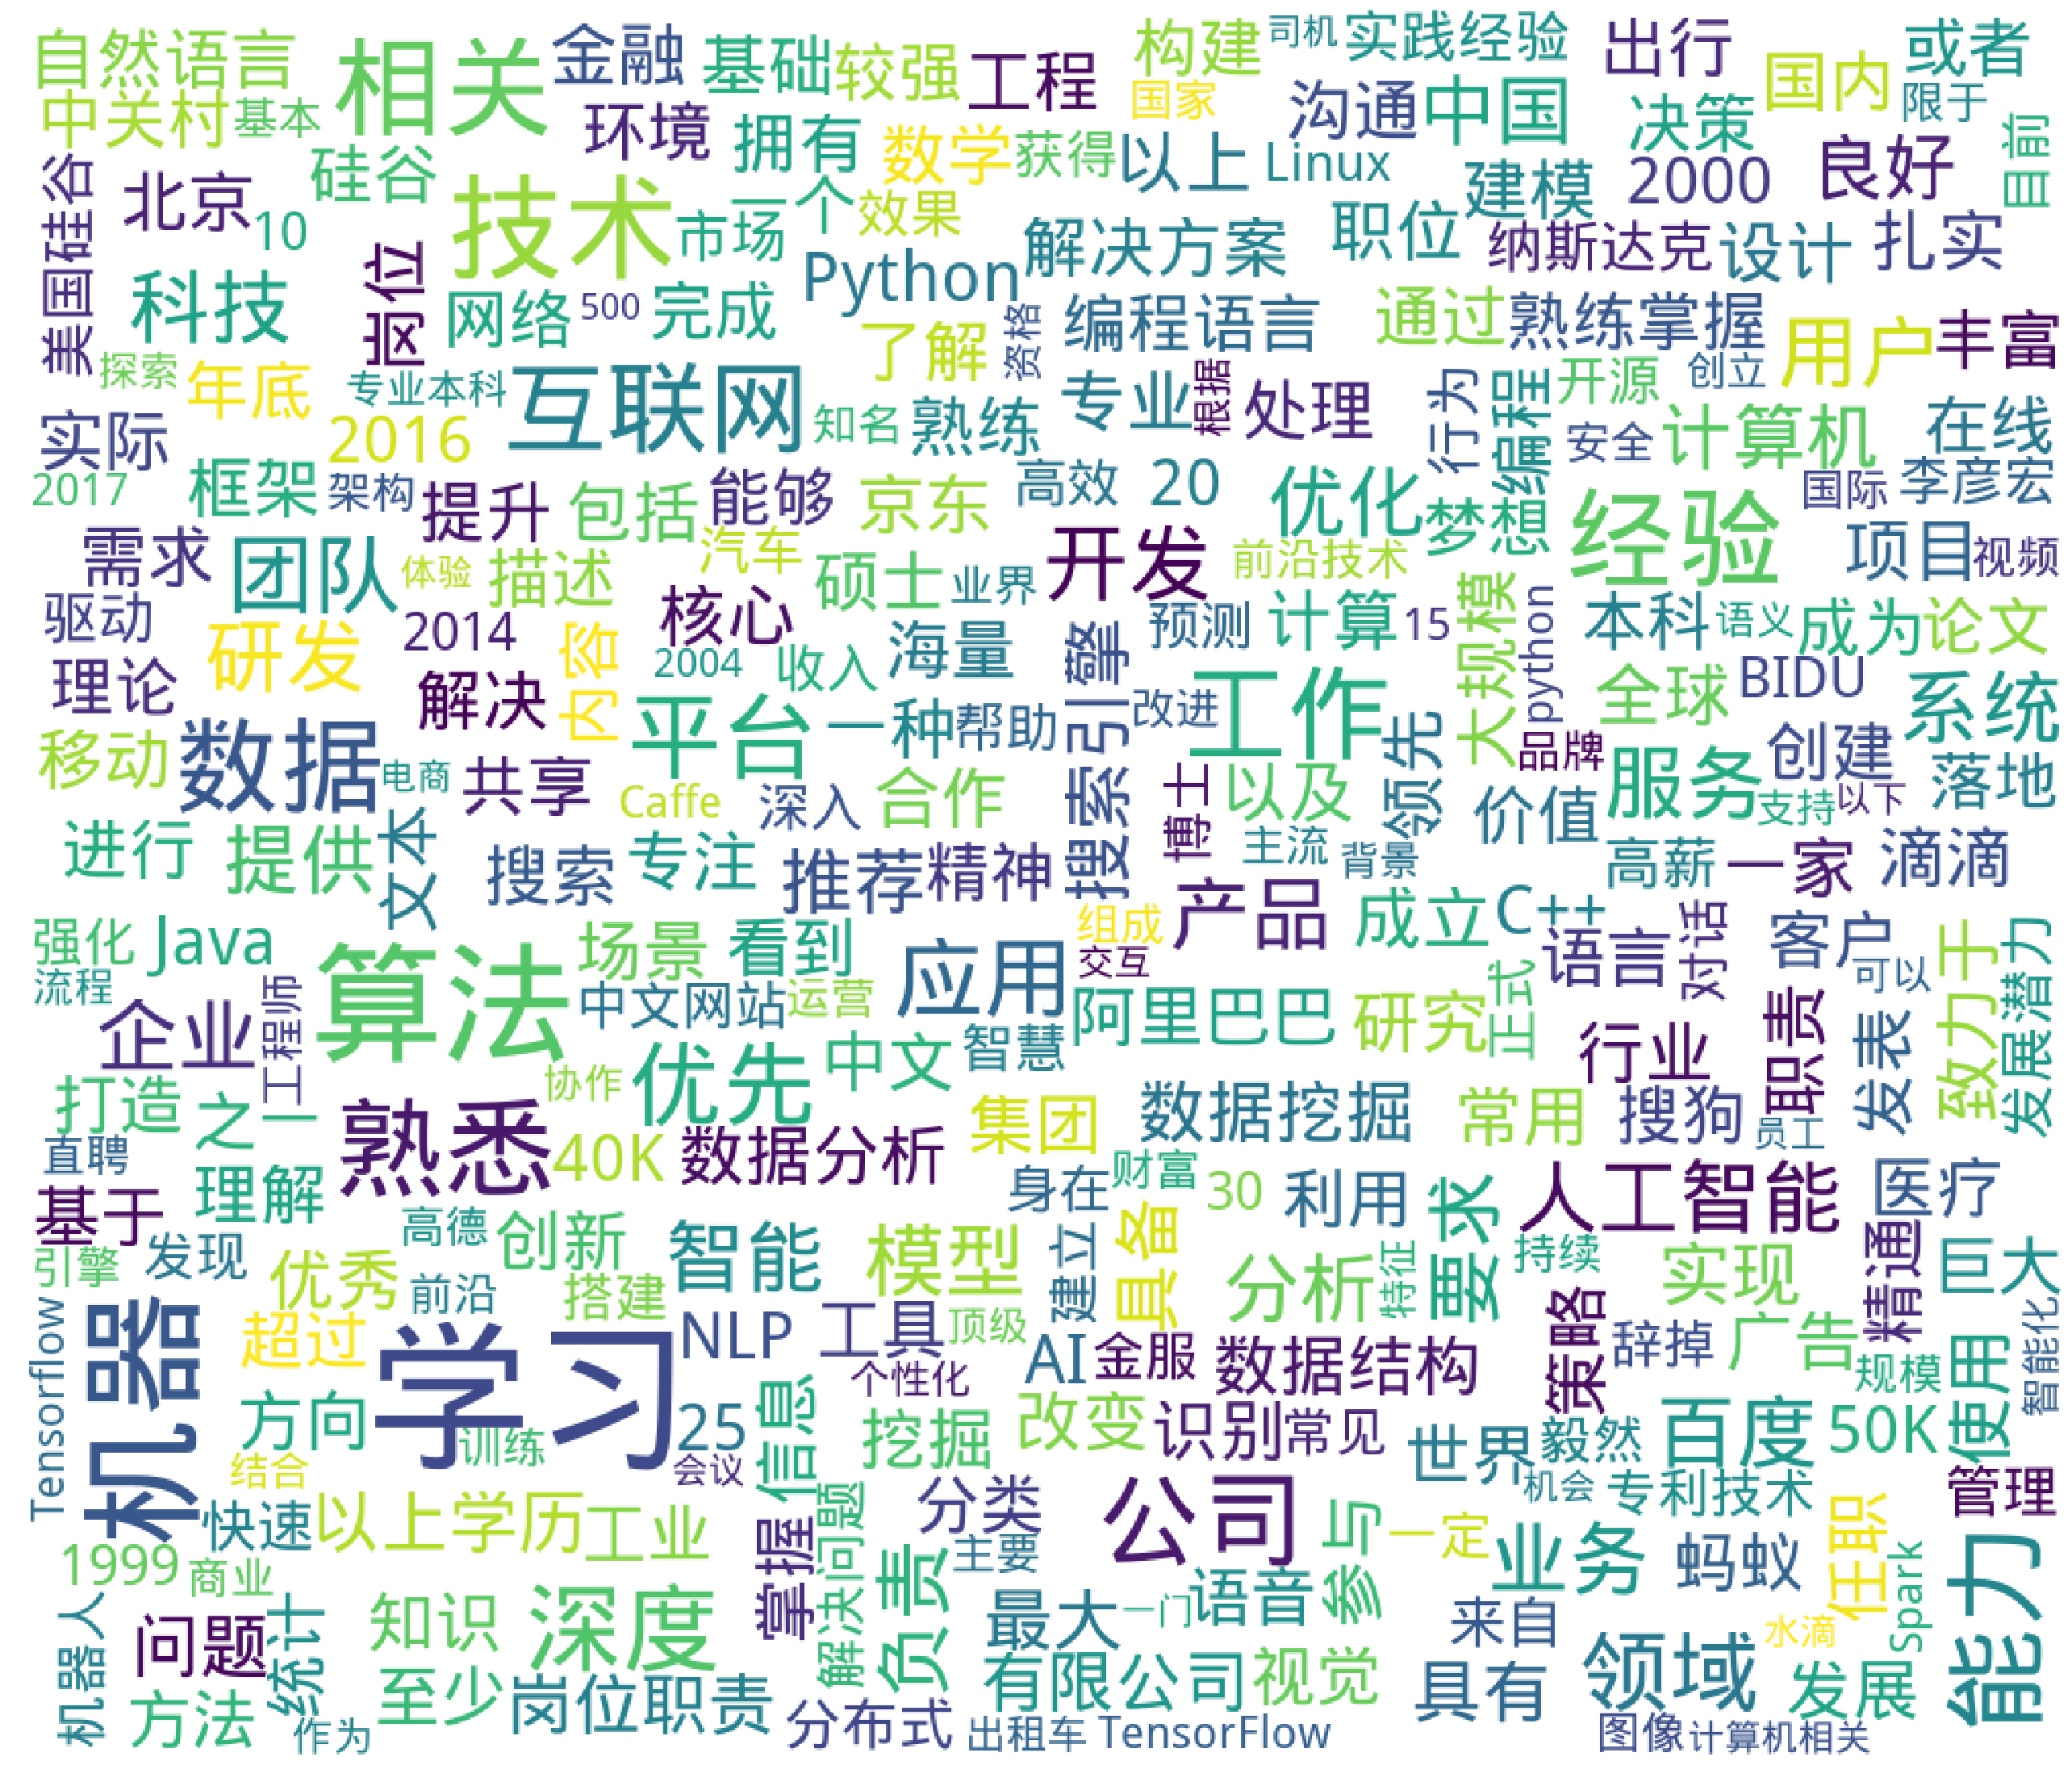

In [106]:
wl = getWordList('./ml/')
show(wl)

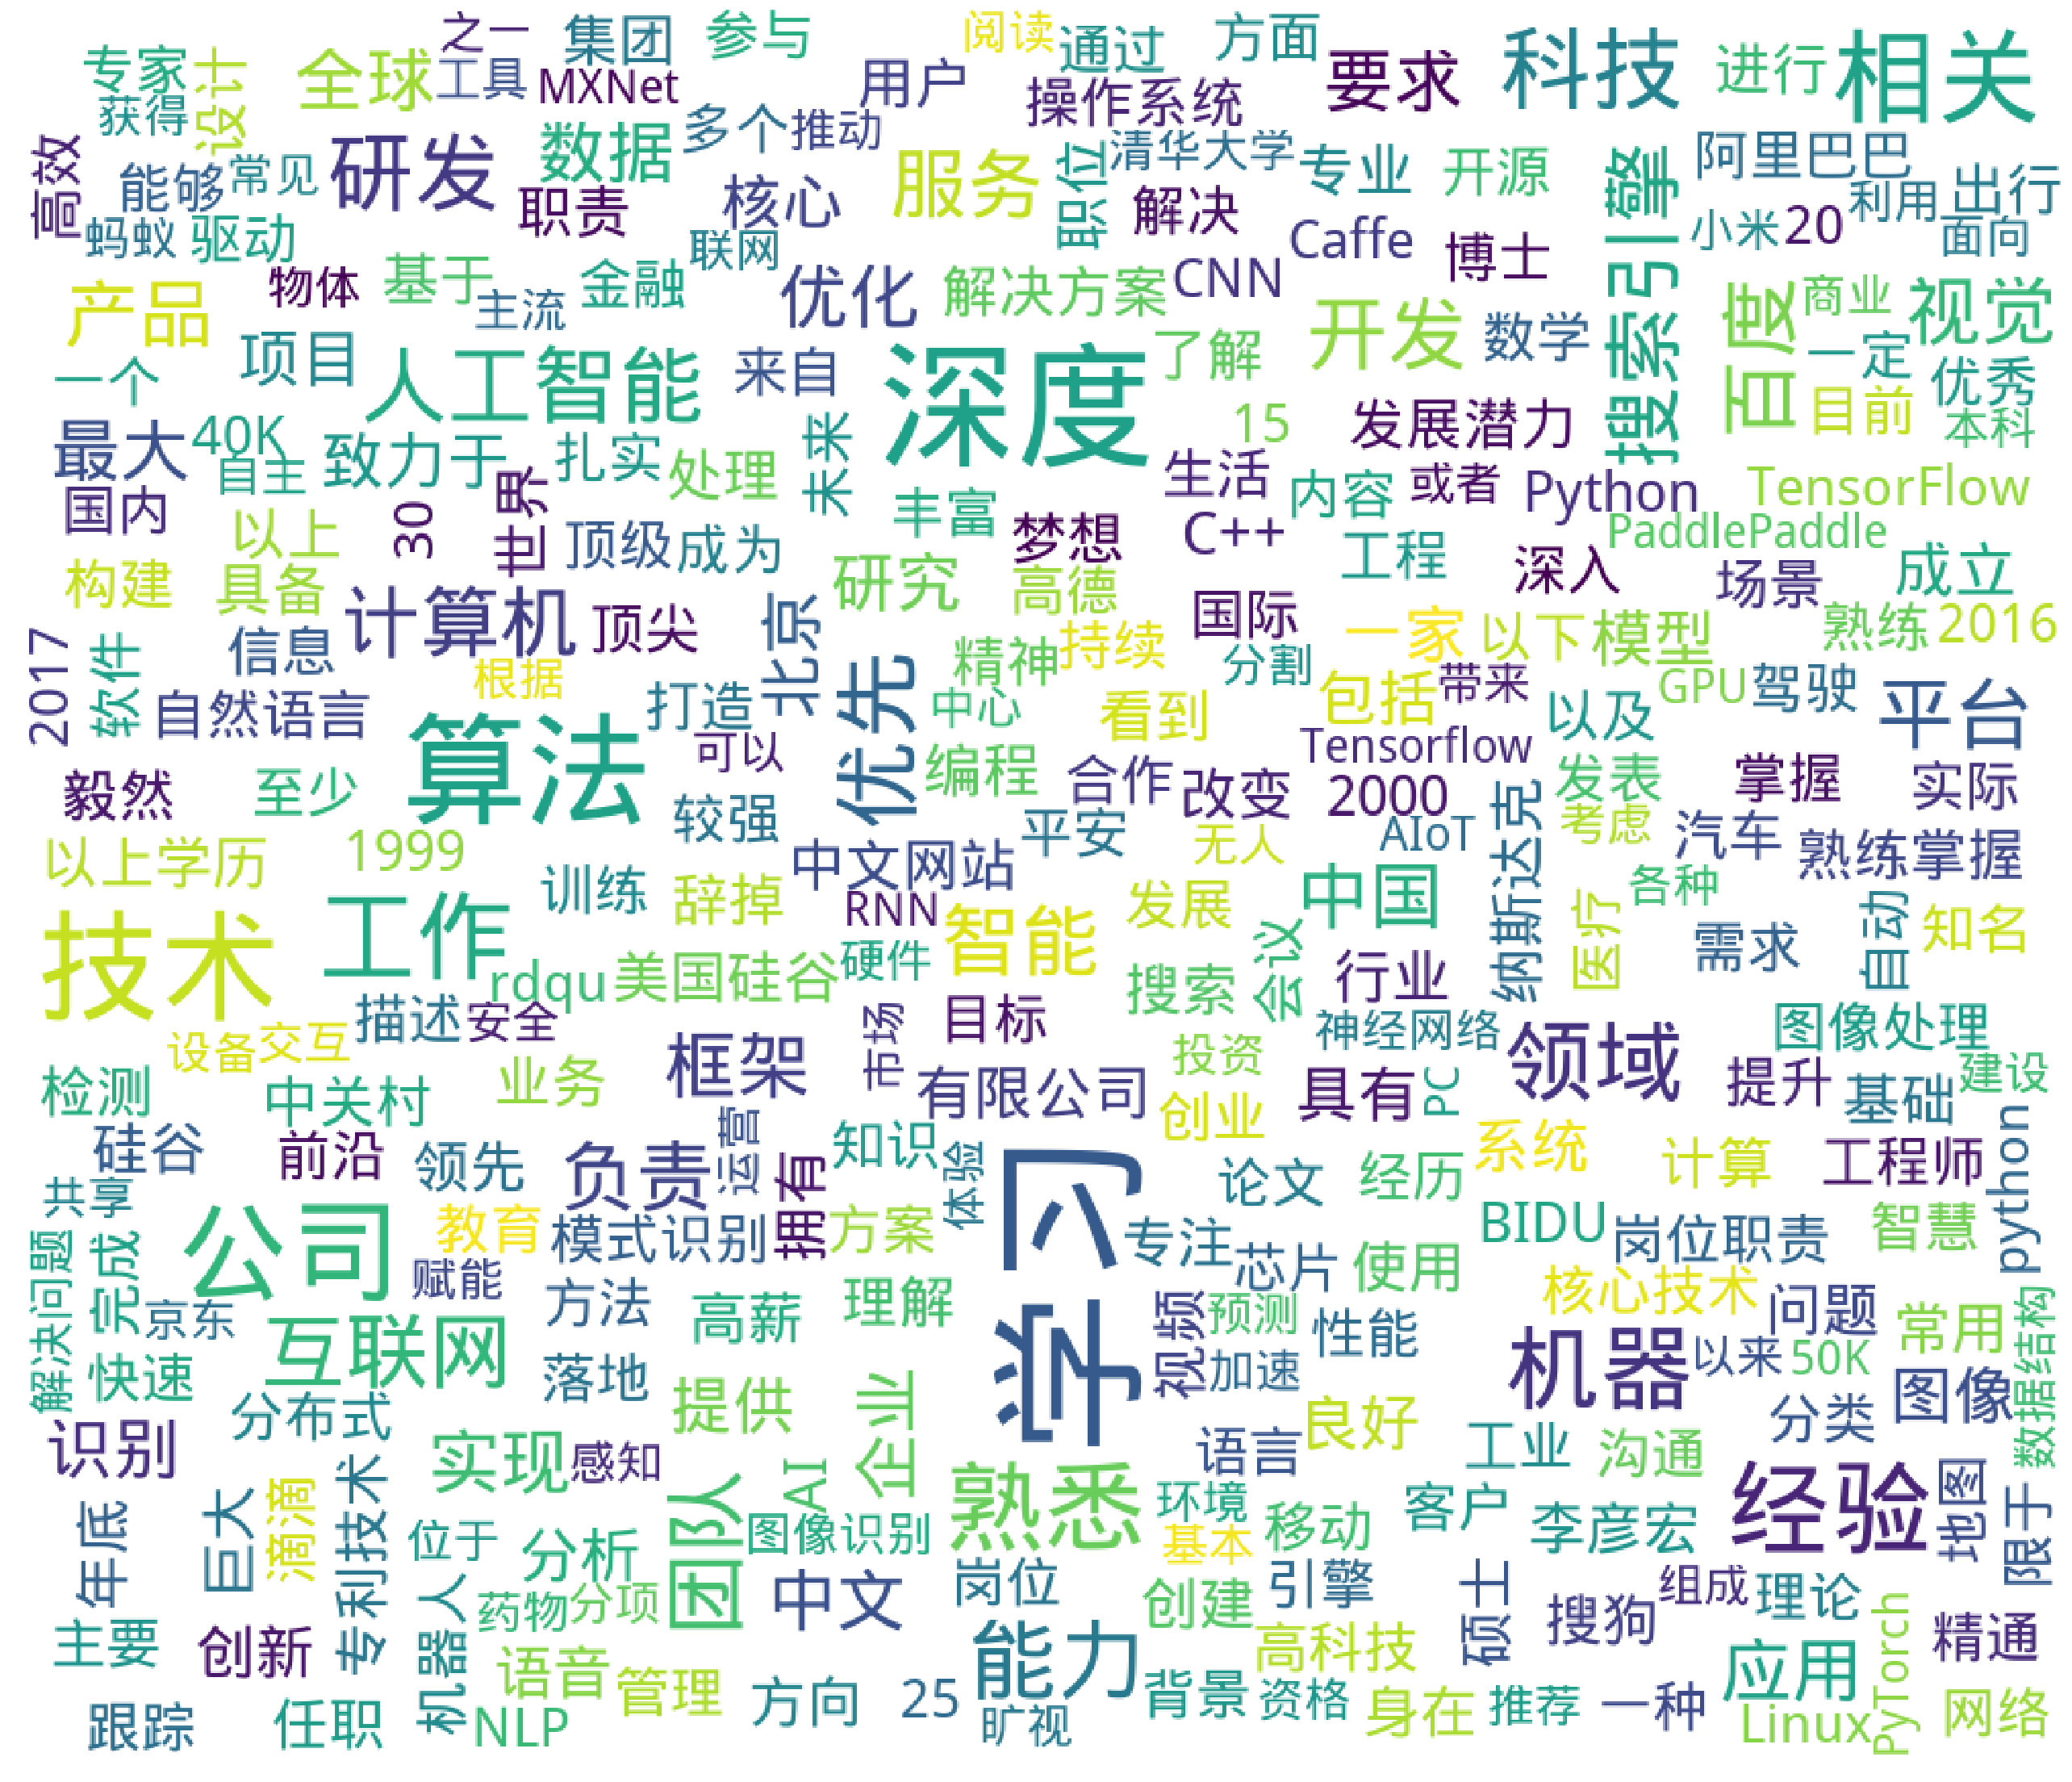

In [107]:
wl = getWordList('./dp/')
show(wl)